In [2]:
import pandas as pd
import numpy as np

fifa  = pd.read_csv('/home/johnorourke/PycharmProjects/Stuff/DS_for_MS/spi_global_rankings_intl.csv')

In [4]:
print(fifa)

     rank                      name    confed   off   def    spi
0       1                    Brazil  CONMEBOL  3.22  0.30  93.55
1       2                     Spain      UEFA  2.80  0.39  89.51
2       3                   Germany      UEFA  3.17  0.62  88.77
3       4                  Portugal      UEFA  2.79  0.48  87.77
4       5                    France      UEFA  2.77  0.48  87.71
..    ...                       ...       ...   ...   ...    ...
215   216               Timor-Leste       AFC  0.27  5.25   0.69
216   217                     Macau       AFC  0.20  5.01   0.66
217   218  Turks and Caicos Islands  CONCACAF  0.43  6.27   0.47
218   219                     Samoa       OFC  0.20  5.78   0.34
219   220                     Tonga       OFC  0.20  6.08   0.26

[220 rows x 6 columns]


In [110]:
# Define Groups

group_a = ['Qatar',
           'Ecuador',
           'Senegal',
           'Netherlands']
group_b =['England',
          'Iran',
          'USA',
          'Wales']
group_c =['Argentina',
          'Saudi Arabia',
          'Mexico',
          'Poland' ]
group_d =['France',
          'Australia',
          'Denmark',
          'Tunisia' ]
group_e =['Spain',
          'Costa Rica',
          'Germany',
          'Japan']
group_f =['Belgium',
          'Canada',
          'Morocco',
          'Croatia']
group_g =['Brazil',
          'Serbia',
          'Switzerland',
          'Cameroon' ]
group_h =['Portugal',
          'Ghana',
          'Uruguay',
          'South Korea']

#make a list of each team in the groups
group_list = [group_a, group_b, group_c, group_d, group_e, group_f, group_g, group_h]
teams_to_groups = []
for group in group_list:
    teams_to_groups.append(group)
flat_list = [item for sublist in teams_to_groups for item in sublist]

In [133]:
def value_getter(item):
    return item[1]

def group_stage(group):
    '''
    teams in a group must all play eachother.
    a win is worth 3 points
    a tie is worth 1 point
    loss is worth 0 points

    teams with the largest two scores advance into the elimintaion round.

    :param group: (group of 4 teams)
    :return: two advancing teams
    '''
    #initailze scores as zero in dictionary
    group_scores = {}
    for i in range(len(group_a)):
        group_scores[group[i]] = 0

    #head to head matches
    #make a list of winning teams, ties are stored as tuples of teams

    matches = [ PredictScore(group[0],group[1],elimination=False), PredictScore(group[0],group[2],elimination=False), PredictScore(group[0],group[3],elimination=False),
                PredictScore(group[1],group[2],elimination=False), PredictScore(group[1],group[3],elimination=False), PredictScore(group[2],group[3],elimination=False)]

    #allocate points to teams
    for match in matches:
        if type(match) is tuple:
            group_scores[match[0]] += 1
            group_scores[match[1]] += 1
        else:
            group_scores[match] += 3

    #find the two highest scores in the dictionary
    winners = sorted(group_scores.items(), key=value_getter)[-2:]
    first = winners[0][0]
    second = winners[1][0]

    #check for a tie and run a tie breaker in the event of a tie
    return first, second


In [134]:
import random
def tie_break():
    roll = random.randint(1,100)
    if roll <= 50:
        return False
    elif roll >= 51:
        return True

In [ ]:
import numpy as np
import collections
from scipy import stats
N = 10000

def PredictScore(home_team,away_team,elimination):

    avg_home_score = fifa.loc[fifa.name == home_team,'off'].values[0]
    avg_away_score = fifa.loc[fifa.name == away_team,'off'].values[0]

    avg_home_goal_conceded = fifa.loc[fifa.name == home_team,'def'].values[0]
    avg_away_goal_conceded = fifa.loc[fifa.name == away_team,'def'].values[0]

    away_goal = np.random.poisson(1/2*(avg_away_score+avg_home_goal_conceded),N)
    home_goal = np.random.poisson(1/2*(avg_home_score+avg_away_goal_conceded),N)

    home_counter = collections.Counter(home_goal)
    away_counter = collections.Counter(away_goal)

    n = 5
    m = 5
    a = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            a[i,j] = (away_counter[i] + home_counter[j])/(10*N)

    tie_odds = a[0,0] + a[1,1] + a[2,2] + a[3,3] + a[4,4]
    home_odds = np.sum(a[0,1:]) + np.sum(a[1,2:]) + np.sum(a[2,3:]) + np.sum(a[3,4:])
    away_odds = np.sum(a[1:,0]) + np.sum(a[2:,1]) + np.sum(a[3:,2]) + np.sum(a[4:,3])

    #tie_odds += 0.05 * np.random.normal(0,1, size=1)
    #home_odds += 0.05 * np.random.normal(0,1, size=1)
    #away_odds += 0.05 * np.random.normal(0,1, size=1)

    if home_odds> away_odds:
        return home_team

    elif tie_odds > home_odds and tie_odds > away_odds and elimination == False:
        return home_team, away_team

    elif tie_odds > home_odds and tie_odds > away_odds and elimination == True:
        if tie_break() == False:
            return home_team
        else:
            return away_team

    else:
        return away_team


In [ ]:
#Group Play
def sim_cup():
    #group play
    group_to_advance = [group_a, group_b, group_c, group_d, group_e, group_f, group_g, group_h]
    teams_to_advance_16 = []
    for group in group_to_advance:
        teams_to_advance_16.append(group_stage(group))


    # Round of 16
    one_16 = PredictScore(teams_to_advance_16[0][0], teams_to_advance_16[1][1], elimination = True)
    two_16 = PredictScore(teams_to_advance_16[2][0], teams_to_advance_16[3][1], elimination = True)

    three_16 = PredictScore(teams_to_advance_16[4][0], teams_to_advance_16[5][1], elimination = True)
    four_16 = PredictScore(teams_to_advance_16[6][0], teams_to_advance_16[7][1], elimination = True)

    five_16 = PredictScore(teams_to_advance_16[1][0], teams_to_advance_16[0][1], elimination = True)
    six_16 = PredictScore(teams_to_advance_16[3][0], teams_to_advance_16[2][1], elimination = True)

    seven_16 = PredictScore(teams_to_advance_16[5][0], teams_to_advance_16[4][1], elimination = True)
    eight_16 = PredictScore(teams_to_advance_16[7][0], teams_to_advance_16[6][1], elimination = True)

    # Round of 8
    one_8 = PredictScore(one_16, two_16, elimination = True)
    two_8 = PredictScore(three_16, four_16, elimination = True)

    three_8 = PredictScore(five_16, six_16, elimination = True)
    four_8 = PredictScore(seven_16, eight_16, elimination = True)

    # Round of 4
    one_4 = PredictScore(one_8, two_8, elimination = True)
    two_4 = PredictScore(three_8, four_8, elimination = True)

    #final
    final = PredictScore(one_4, two_4, elimination = True)
    return final


In [154]:
#Monte Carlo
final_wins = {}
for i in flat_list:
    final_wins[i] = 0

for i in range(100):
    winner = sim_cup()
    final_wins[winner] += 1

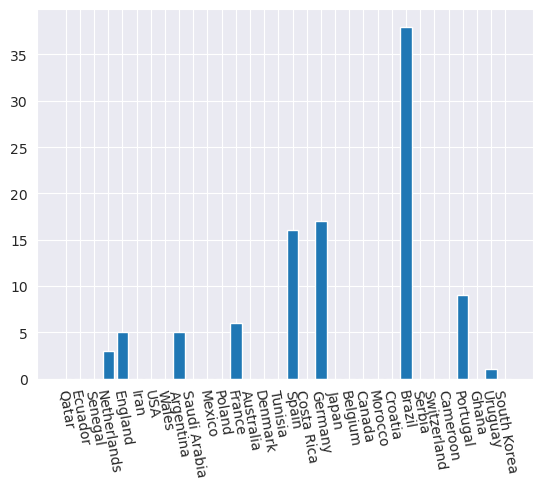

In [155]:
import matplotlib.pyplot as plt
names = final_wins.keys()
values = final_wins.values()
plt.bar(names, values)
plt.xticks(rotation = -80)
plt.show()